In [5]:
from __future__ import division
import sys,os
import time
import argparse

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

import pandas as pd
from   glob import glob

sys.path.append('../BackendTools')
import ResonanceFitter as fitres
import ResonanceFitResult as fitclass
from VNAMeas import *

sys.path.append('../AnalysisScripts')
from plot_VNA_PowerScan import create_dirs,get_input_files,fit_single_file

In [6]:
## Set up matplotlib options for plots
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')
dfc = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
## Flag to display plots
show_plots = True
save_plots = False

## Series identifier 20230710_111721
day    = '20230710' # '20230224' # 
time   = '111721' # '075318' # 
series = day + '_' + time

## Path to VNA data
dataPath = '/data/TempSweeps/VNA/'

## Create a place to store processed output
out_path = '/data/ProcessedOutputs/out_' + series

Storing output at /data/ProcessedOutputs/out_20220216_123052
Searching for files in: /data/PowerSweeps/VNA/20230710/20230710_111721/
 with prefix: Psweep_P
 and  suffix: _20230710_111721.h5
Using files:
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-50.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-45.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-40.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-35.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-30.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-25.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-20.0_20230710_111721.h5
- /data/PowerSweeps/VNA/20230710/20230710_111721/Psweep_P-15.0_20230710_111721.h5
VNA Measurement: 20230710_111721
====---------------------------====
|             Date:   20230710
|   RF Power [dBm]:   -50.0
|   N average

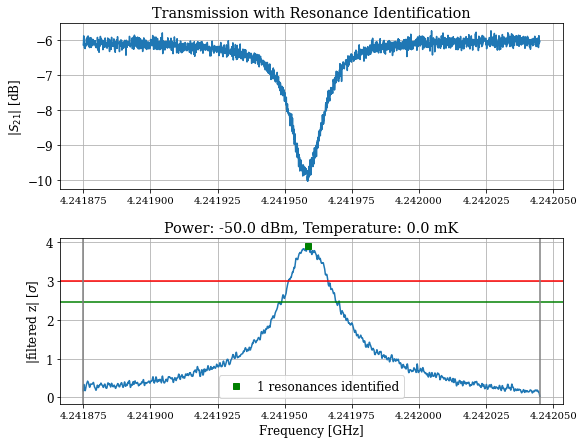

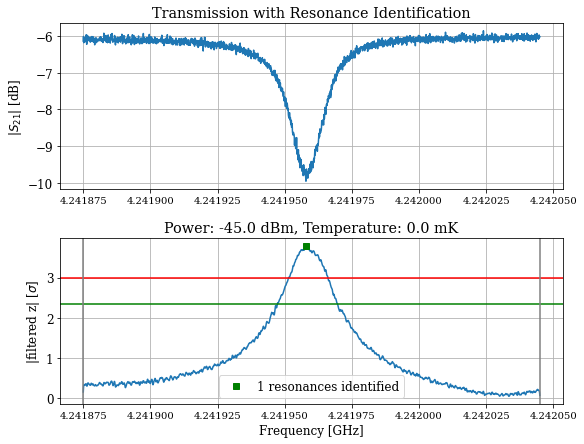

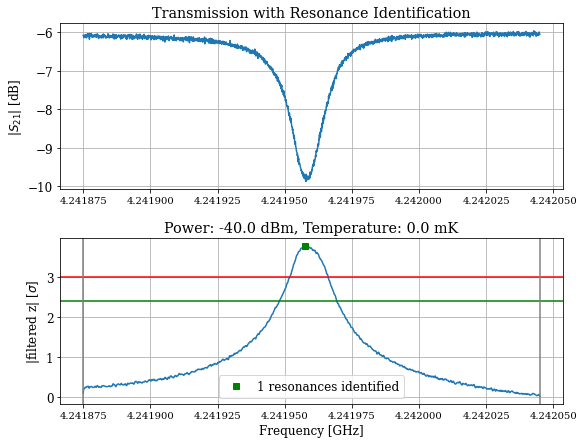

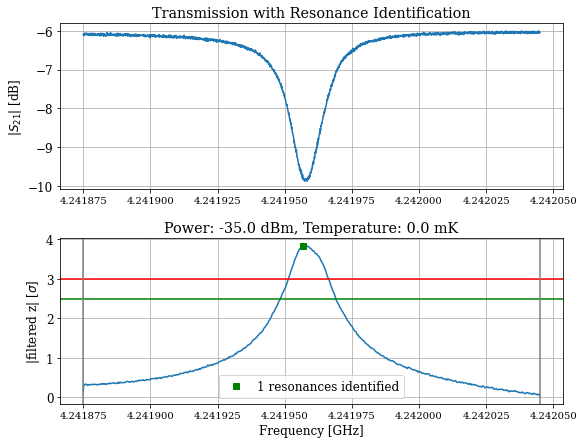

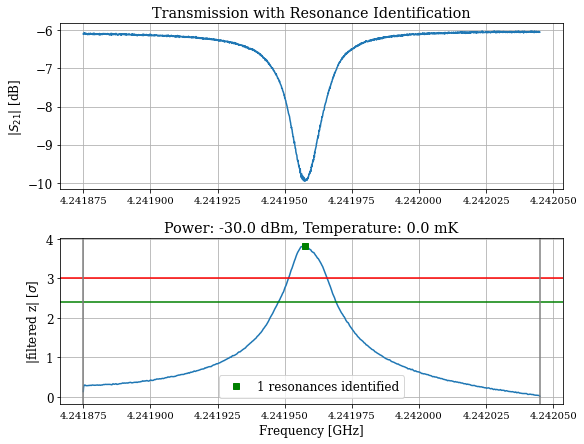

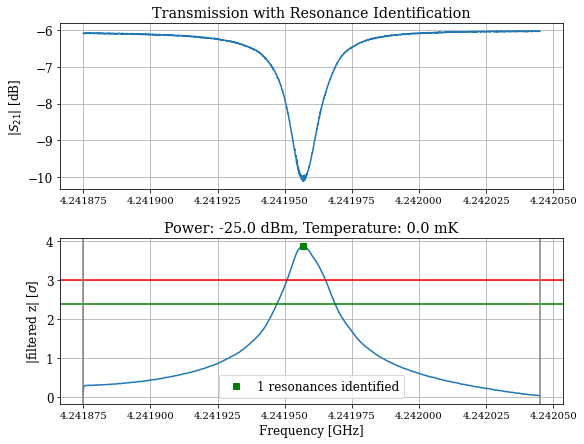

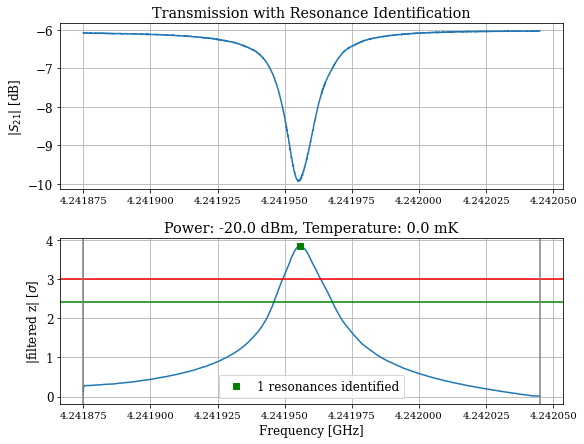

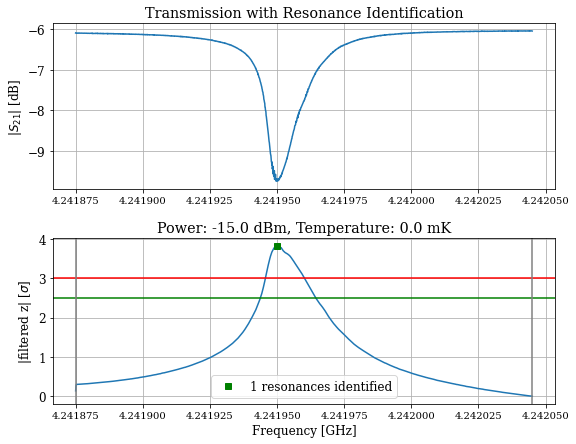

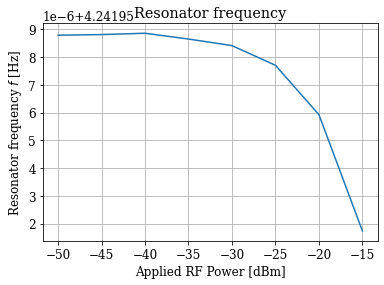

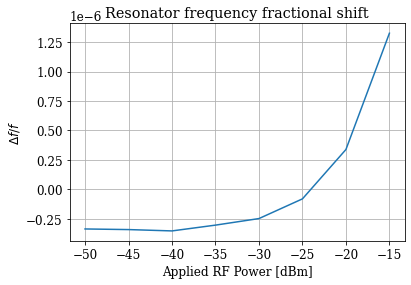

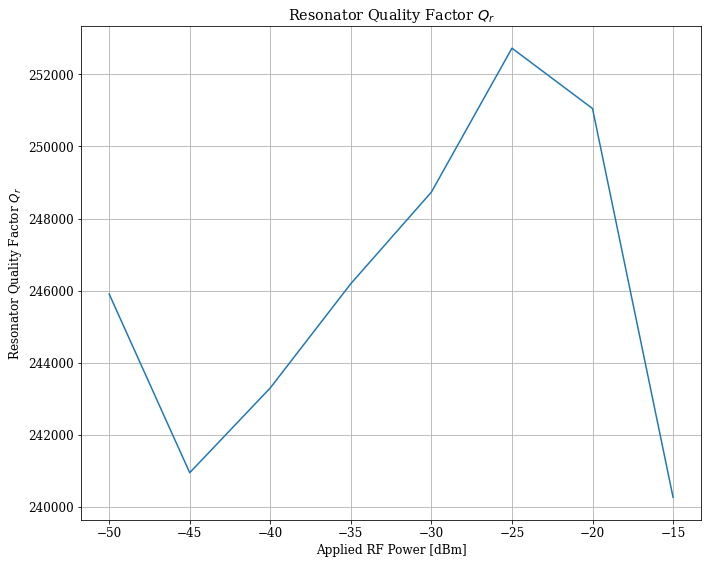

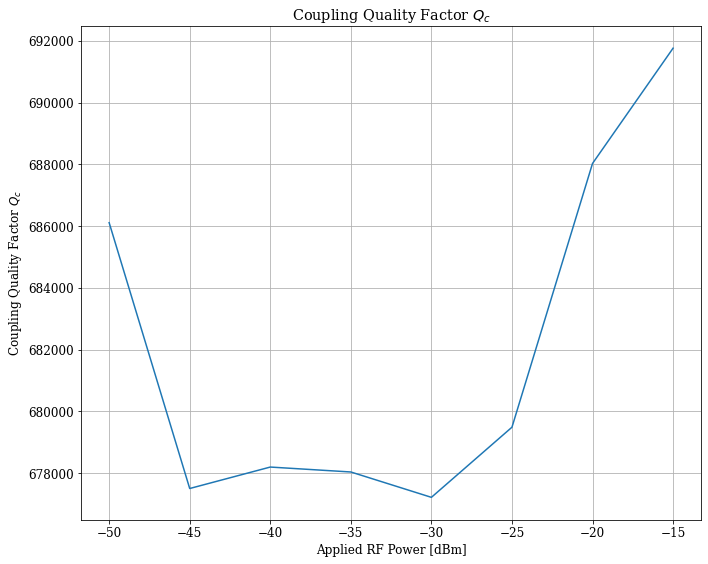

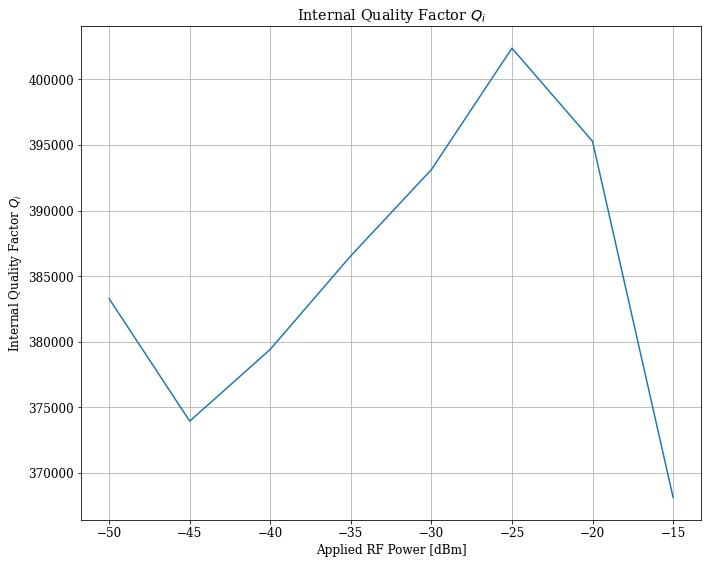

In [8]:
## Define all the lists in which we'll store fit parameters
## Make these fixed size arrays or delete completely since it seems
## to be a little redundant
fr_list = []; Qr_list = []; Qc_list = []; Qi_list = []; 
power_list = []

## Create somewhere for the output
create_dirs()

## Get all the files for a specified series
vna_files = get_input_files(series)

## Create a class instance containing the fit results for this series
result = fitres.SeriesFitResult(day,series)
result.resize_file_fits(len(vna_files))

for i in np.arange(len(vna_files)):
    ## Fit this data file
    pwr, fr, Qr, Qc, Qi, res = fit_single_file(vna_files[i],show_plots=show_plots)
    result.file_fits[i] = res 
    result.powers[i] = pwr
    result.fit_fr[i] = fr
    result.fit_Qr[i] = Qr
    result.fit_Qi[i] = Qi
    result.fit_Qc[i] = Qc

    ## Store the fit results
    fr_list.append(fr); Qr_list.append(Qr)
    Qc_list.append(Qc); Qi_list.append(Qi)
    power_list.append(pwr)

## Store the fit results
if save_plots:
    result.save_to_file(out_path)

fig = plt.figure()
plt.plot(power_list,fr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator frequency $f$ [Hz]')
plt.title(r'Resonator frequency')
if save_plots:
    fig.savefig(os.path.join(out_path,"f_vs_P.png"), format='png')

fig = plt.figure()
plt.plot(power_list,(np.mean(fr_list)-fr_list)/fr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'$\Delta f/f$')
plt.title(r'Resonator frequency fractional shift')
if save_plots:
    fig.savefig(os.path.join(out_path,"df_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator Quality Factor $Q_r$')
plt.title(r'Resonator Quality Factor $Q_r$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qr_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qc_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Coupling Quality Factor $Q_c$')
plt.title(r'Coupling Quality Factor $Q_c$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qc_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qi_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Internal Quality Factor $Q_i$')
plt.title(r'Internal Quality Factor $Q_i$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qi_vs_P.png"), format='png')